In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [5]:
ticker_symbol = '^NSEI' 
start_date = '2018-01-01'
end_date = '2024-03-31'


In [6]:

nifty100_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [7]:
nifty100_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400
2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300
2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900
2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900
2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000
...,...,...,...,...,...,...
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400


In [9]:
#converting data into HA conadle data
nifty100_data['HA_Close'] = (nifty100_data['Open'] + nifty100_data['High'] + nifty100_data['Low'] + nifty100_data['Close']) / 4
nifty100_data['HA_Open'] = (nifty100_data['Open'].shift(1) + nifty100_data['Close'].shift(1)) / 2
nifty100_data['HA_High'] =nifty100_data[['HA_Open', 'HA_Close', 'High']].max(axis=1)
nifty100_data['HA_Low'] =nifty100_data[['HA_Open', 'HA_Close', 'Low']].min(axis=1)
nifty100_data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)                                                                            
                                                                             

In [10]:
nifty100_data

,Adj Close,HA_Close,HA_Open,HA_High,HA_Low
Date,,,,,
2018-01-02,10442.200195,10454.900146,NaN,10495.200195,10404.650391
2018-01-03,10443.200195,10464.750000,10459.875000,10503.599609,10429.549805
2018-01-04,10504.799805,10482.162598,10462.925293,10513.000000,10441.450195
2018-01-05,10558.849609,10544.824707,10487.100098,10566.099609,10487.100098
2018-01-08,10623.599609,10608.762451,10546.549805,10631.200195,10546.549805
...,...,...,...,...,...
2024-03-21,22011.949219,22006.024902,21841.500000,22080.949219,21841.500000
2024-03-22,22096.750000,22023.237305,22000.924805,22180.699219,21883.300781
2024-03-26,22004.699219,21993.337402,22014.474609,22073.199219,21947.550781


In [11]:

nifty100_data['color'] = np.where(nifty100_data['HA_Close'] > nifty100_data['HA_Open'], 'Green', 'Red')

In [12]:
nifty100_data

,Adj Close,HA_Close,HA_Open,HA_High,HA_Low,color
Date,,,,,,
2018-01-02,10442.200195,10454.900146,NaN,10495.200195,10404.650391,Red
2018-01-03,10443.200195,10464.750000,10459.875000,10503.599609,10429.549805,Green
2018-01-04,10504.799805,10482.162598,10462.925293,10513.000000,10441.450195,Green
2018-01-05,10558.849609,10544.824707,10487.100098,10566.099609,10487.100098,Green
2018-01-08,10623.599609,10608.762451,10546.549805,10631.200195,10546.549805,Green
...,...,...,...,...,...,...
2024-03-21,22011.949219,22006.024902,21841.500000,22080.949219,21841.500000,Green
2024-03-22,22096.750000,22023.237305,22000.924805,22180.699219,21883.300781,Green
2024-03-26,22004.699219,21993.337402,22014.474609,22073.199219,21947.550781,Red


In [17]:
capital = 100000


td_results = pd.DataFrame(columns=['Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'Profit/Loss'])
current_capital = [capital]


in_position = False
entry_price = None
entry_time = None
exit_price = None
exit_time = None
profit_loss = None



for index, row in nifty100_data.iterrows():
    if row['color'] == 'Green' and not in_position:
        entry_price = row['HA_Close']
        entry_time = index
        in_position = True
        
        
    elif row['color'] == 'Red' and in_position:
        exit_price = row['HA_Close']
        exit_time = index
        profit_loss = (exit_price - entry_price) * (capital/ entry_price)
        capital += profit_loss
        td_results = td_results.append({'Entry Time': entry_time, 'Entry Price': entry_price,
                                              'Exit Time': exit_time, 'Exit Price': exit_price,
                                              'Profit/Loss': profit_loss}, ignore_index=True)
        current_capital.append(capital)
        in_position = False


In [18]:
td_results

,Entry Time,Entry Price,Exit Time,Exit Price,Profit/Loss
0,2018-01-03,10464.750000,2018-01-10,10633.112549,1608.853999
1,2018-01-12,10662.824951,2018-01-16,10728.037354,621.426076
2,2018-01-17,10740.187500,2018-01-25,11067.512451,3115.636616
3,2018-01-29,11114.312500,2018-01-30,11081.375000,-312.194851
4,2018-02-07,10536.075195,2018-02-09,10437.462646,-983.064645
...,...,...,...,...,...
280,2024-02-23,22246.574707,2024-02-26,22142.137695,-3213.377818
281,2024-02-27,22148.112305,2024-02-28,22077.562500,-2170.131249
282,2024-03-01,22197.025391,2024-03-05,22353.400391,4784.249847
283,2024-03-06,22380.774902,2024-03-11,22421.000000,1229.170459


In [19]:
print(f"Final Capital: {capital:.2f} INR")

Final Capital: 684730.26 INR


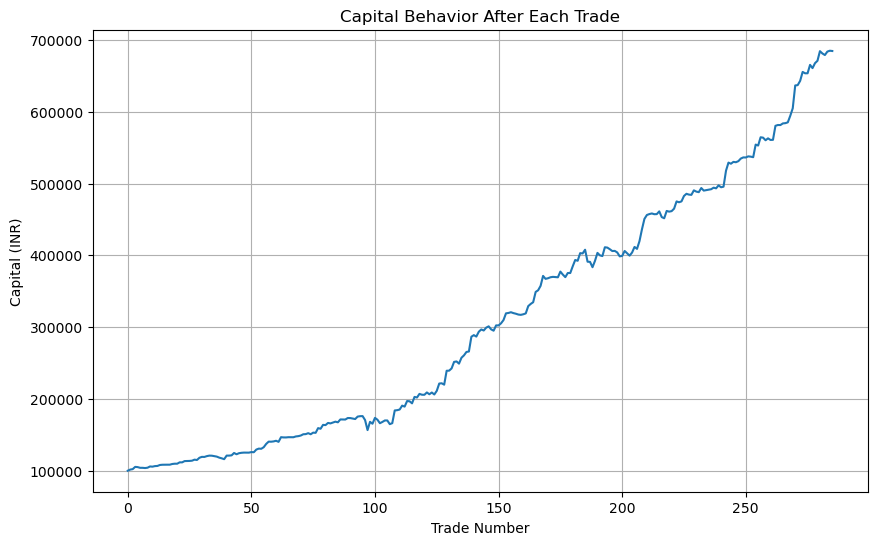

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(current_capital)
plt.title('Capital Behavior After Each Trade')
plt.xlabel('Trade Number')
plt.ylabel('Capital (INR)')
plt.grid(True)
plt.show()

In [21]:
!pip install nbconvert